In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
import pathlib
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matminer.featurizers.structure import XRDPowderPattern

from algorithms import pca_algo, kmeans_algo, nmf_algo, tsne_algo
from val_sort import sort_clusterlabels, name_change, plot2d, plot3d, hyperparameter_testing

In [3]:
pathfile = r'C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\df_xrd_hfo2_del_5_65.pkl'
path = pathlib.WindowsPath(pathfile)
df = pd.read_pickle(path)
df

structure  \
0     [[1.38867986 2.3864784  4.36482979] Hf, [3.587...   
1     [[1.40181386 2.3944349  4.3885007 ] Hf, [3.606...   
2     [[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...   
3     [[-8.73105937  2.58337834  3.5977214 ] Hf, [-6...   
4     [[1.37820795 2.39009891 4.37039843] Hf, [3.622...   
...                                                 ...   
1720  [[ 1.26076304 -5.11876687  1.26075093] Hf, [ 1...   
1721  [[  1.2262443  -10.12402918  -3.43749088] Hf, ...   
1722  [[1.39997305 0.20795941 1.85144277] Hf, [1.451...   
1723  [[-8.97250742 -0.20890362  1.50328354] Hf, [-8...   
1724  [[1.26076659 9.90848891 1.27892142] Hf, [1.260...   

                                name          xrd_0          xrd_1  \
0        Ag_HfO2_cat_3.125_222_m.cif   4.163294e-94   2.126695e-80   
1        Ag_HfO2_cat_3.125_222_o.cif   1.425278e-93   7.545307e-80   
2      Ag_HfO2_cat_3.125_222_p-o.cif  1.247942e-149  1.132106e-127   
3        Ag_HfO2_cat_3.125_222_t.cif   0.000000e+00   0.000000e+00   
4         Ag_HfO2_cat_6.25_122_m.cif   6.262093e-11   1.541005e-07   
...                              ...            ...            ...   
1720    Zr_HfO2_inter_6.25_212_t.cif   0.000000e+00   0.000000e+00   
1721    Zr_HfO2_inter_6.25_221_m.cif   1.652921e-95   1.745521e-81   
1722    Zr_HfO2_inter_6.25_221_o.cif   1.675315e-12   1.191654e-08   
1723  Zr_HfO2_inter_6.25_221_p-o.cif  2.322144e-157  6.921018e-134   
1724    Zr_HfO2_inter_6.25_221_t.cif   0.000000e+00   0.000000e+00   

              xrd_2         xrd_3         xrd_4         xrd_5         xrd_6  \
0      8.339854e-68  2.510712e-56  5.802573e-46  1.029507e-36  1.402244e-28   
1      2.999259e-67  8.951811e-56  2.006170e-45  3.375860e-36  4.265411e-28   
2     1.703542e-107  4.251978e-89  1.760362e-72  1.208887e-57  1.377025e-44   
3      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4      2.952350e-05  4.403630e-04  5.113673e-04  4.623110e-05  3.253979e-07   
...             ...           ...           ...           ...           ...   
1720   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1721   1.303483e-68  6.883250e-57  2.570331e-46  6.787225e-37  1.267369e-28   
1722   5.714564e-06  1.847547e-04  4.027053e-04  5.917777e-05  5.862856e-07   
1723  2.349946e-112  9.089770e-93  4.005484e-75  2.010778e-59  1.149954e-45   
1724   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

             xrd_7  ...        xrd_51        xrd_52        xrd_53    xrd_54  \
0     1.466232e-21  ...  3.366248e-02  3.330416e-02  1.666865e-02  0.018911   
1     4.046665e-21  ...  1.718201e-02  4.071149e-02  3.064061e-02  0.012806   
2     2.601783e-33  ...  1.726533e-02  7.512397e-03  2.634535e-04  0.014588   
3     0.000000e+00  ...  2.846123e-17  1.101831e-12  2.117069e-07  0.000534   
4     1.783095e-10  ...  3.055573e-02  3.008895e-02  1.683308e-02  0.019296   
...            ...  ...           ...           ...           ...       ...   
1720  0.000000e+00  ...  3.632147e-19  5.486837e-12  8.420608e-07  0.001336   
1721  1.673483e-21  ...  3.985626e-02  2.611494e-02  1.789166e-02  0.012697   
1722  3.915969e-10  ...  3.154613e-02  3.551956e-02  2.094031e-02  0.016007   
1723  7.492104e-34  ...  2.540069e-03  4.751250e-03  9.841309e-04  0.016372   
1724  0.000000e+00  ...  3.584353e-19  5.484489e-12  8.495767e-07  0.001356   

        xrd_55    xrd_56    xrd_57    xrd_58        xrd_59        xrd_60  
0     0.010830  0.019990  0.014474  0.021195  2.101365e-02  7.512736e-03  
1     0.020706  0.025123  0.015981  0.026507  9.700538e-03  6.676516e-04  
2     0.020729  0.050490  0.045077  0.001179  7.069801e-07  8.044184e-12  
3     0.020838  0.044549  0.016139  0.001454  4.465383e-03  1.036061e-03  
4     0.011096  0.020024  0.017230  0.021155  2.215140e-02  4.816403e-03  
...        ...       ...       ...       ...           ...           ...  
1720  0.030656  0.041784  0.001556  0.005553  7.398085e-03  1.000607e-04 

In [4]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [5]:
X = df.iloc[:,2:]

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[5.74143610e-086, 2.90504888e-075, 1.17638033e-064, ...,
        7.34565335e-001, 8.48318769e-001, 4.49184177e-001],
       [1.96554548e-085, 1.03068309e-074, 4.23061267e-064, ...,
        9.18673748e-001, 3.91609667e-001, 3.99186873e-002],
       [1.72098822e-141, 1.54644869e-122, 2.40293517e-104, ...,
        4.08744508e-002, 2.85407115e-005, 4.80959334e-010],
       ...,
       [2.31036093e-004, 1.62778976e-003, 8.06069315e-003, ...,
        4.53707120e-001, 2.75197784e-001, 1.50778340e-001],
       [3.20237785e-149, 9.45405715e-129, 3.31472244e-109, ...,
        5.03211652e-002, 6.22066121e-003, 1.22602506e-005],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.20475969e-001, 1.86818879e-001, 3.72682493e-003]])

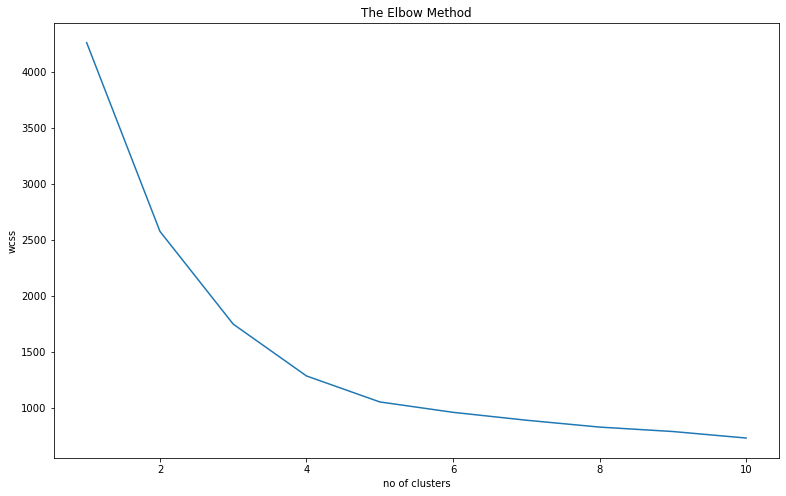

In [7]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
# PCA Testing

[43.4 62.4 74.  80.3 85.  87.7 89.6 90.7 91.7 92.5 93.2 93.8 94.3 94.8
 95.2 95.6 95.9 96.2 96.5 96.8 97.  97.2 97.4 97.6 97.8 98.  98.2 98.3
 98.4 98.5 98.6 98.7 98.8 98.9 99.  99.1 99.2 99.3 99.4 99.5 99.5 99.5
 99.5 99.5 99.5 99.5 99.5 99.5 99.5 99.5]


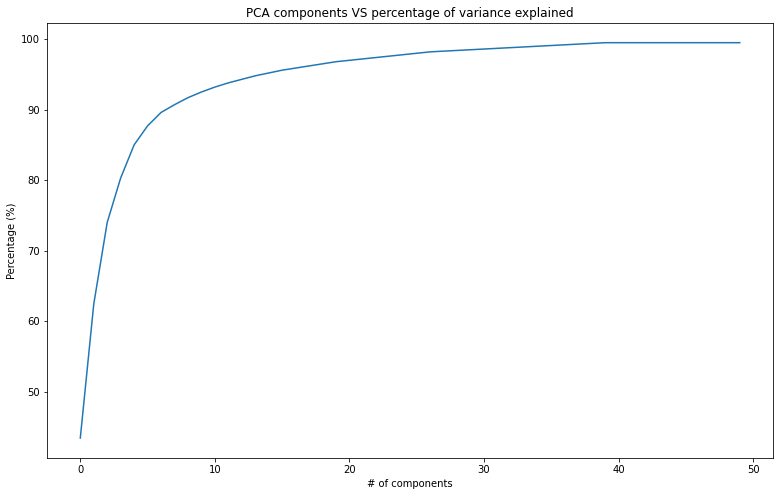

In [9]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
print(variance_ratio)
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [10]:
comp = 15 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, 5)

In [11]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.5343018865944246

In [12]:
dfpca_kmeans['labels'] = labels_true

In [13]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

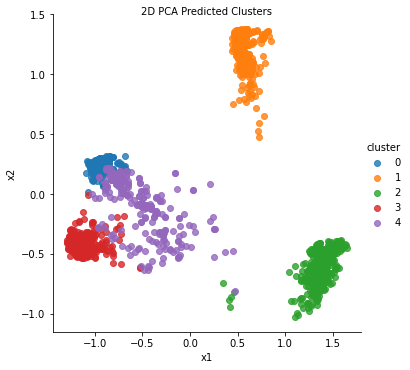

In [14]:
plot2d(dfpca_kmeans3, "2D PCA Predicted Clusters", 'cluster')

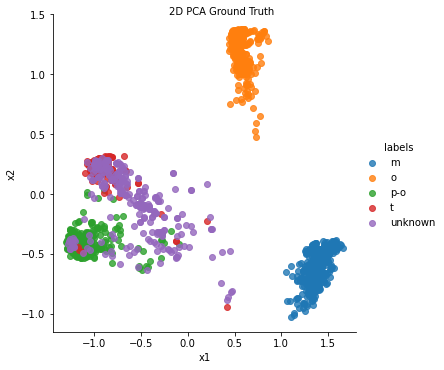

In [15]:
plot2d(dfpca_kmeans3, "2D PCA Ground Truth", 'labels')

In [16]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [17]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [18]:
dfpca_kmeans = sort_clusterlabels(dfpca_kmeans)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.9205797101449276


In [19]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[215,   0,   1,   3,  26],
       [  0, 345,   0,   0,   0],
       [  0,   0, 460,   0,   0],
       [  1,   0,   0, 376,  27],
       [ 49,   0,   4,  26, 192]], dtype=int64)

In [20]:
comp = list(range(1, 55 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49
Round: 50
Round: 51
Round: 52
Round: 53
Round: 54
Best value of performance: 0.9211594202898551 Hyperparameter = 24
Overview: {1: 0.8498550724637681, 2: 0.8979710144927536, 3: 0.9055072463768116, 4: 0.9002898550724637, 5: 0.9159420289855073, 6: 0.92, 7: 0.9205797101449276, 8: 0.9205797101449276, 9: 0.9205797101449276, 10: 0.9205797101449276, 11: 0.9205797101449276, 12: 0.9205797101449276, 13: 0.9205797101449276, 14: 0.9205797101449276, 15: 0.9205797101449276, 16: 0.9205797101449276, 17: 0.9205797101449276, 18: 0.9

In [21]:
# TSNE Testing

In [22]:
perplex = 20 # change value here

dftsne = tsne_algo(X, perplex)
dftsne_kmeans = kmeans_algo(dftsne[[0, 1, 2]], n_clusters = 5)

In [23]:
dftsne_kmeans['labels'] = labels_true

In [24]:
metrics.silhouette_score(dftsne, dftsne_kmeans['cluster'], metric='l2')

0.46325096

In [25]:
dftsne_kmeans3 = name_change(dftsne_kmeans)

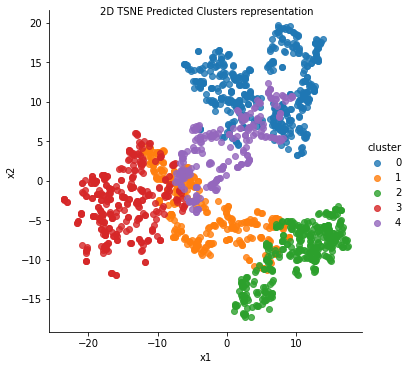

In [26]:
plot2d(dftsne_kmeans3,"2D TSNE Predicted Clusters representation",'cluster')

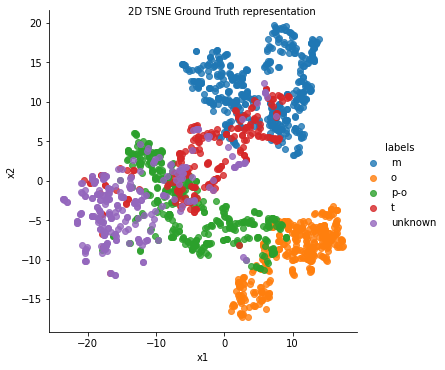

In [27]:
plot2d(dftsne_kmeans3,"2D TSNE Ground Truth representation",'labels')

In [28]:
plot3d(dftsne_kmeans3, 'TSNE 3D Ground Truth', 'labels')

In [29]:
plot3d(dftsne_kmeans3, 'TSNE 3D Prediction', 'cluster')

In [30]:
dftsne_kmeans = sort_clusterlabels(dftsne_kmeans)
acc = accuracy_score(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])
print(acc)

0.8927536231884058


In [31]:
confusion_matrix(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])

array([[460,   0,   0,   0,   0],
       [  0, 322,   0,  82,   0],
       [  0,   0, 345,   0,   0],
       [  3,  16,   0, 215,  37],
       [  1,   3,   0,  43, 198]], dtype=int64)

In [32]:
#Hyperparameter Testing TSNE

In [33]:
perplexity = list(range(20, 25, 1))
hyperparameter_testing(X,'tsne', perplexity, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Best value of performance: 0.9147826086956522 Hyperparameter = 23
Overview: {20: 0.896231884057971, 21: 0.8823188405797101, 22: 0.7727536231884058, 23: 0.9147826086956522, 24: 0.8979710144927536}


In [34]:
# NMF Testing 

In [35]:
component = 8
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, 5) # calculate clusterlabels and asign labels to W_df_kmeans 

In [36]:
W_df_kmeans['labels'] = labels_true

In [37]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

0.732482806681961

In [38]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

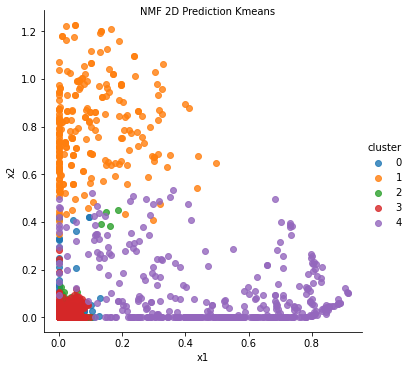

In [39]:
plot2d(W_df_kmeans3,title='NMF 2D Prediction Kmeans', clus_lab = 'cluster' )

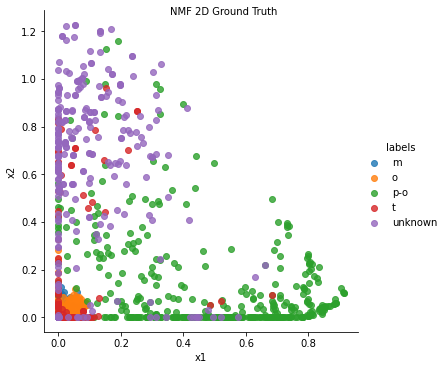

In [40]:
plot2d(W_df_kmeans3,title='NMF 2D Ground Truth', clus_lab = 'labels' )

In [41]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [42]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [43]:
W_df_kmeans = sort_clusterlabels(W_df_kmeans)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

0.9252173913043479


In [44]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

array([[214,  27,   1,   0,   3],
       [ 47, 195,   3,   0,  26],
       [  0,   0, 460,   0,   0],
       [  0,   0,   0, 345,   0],
       [  0,  22,   0,   0, 382]], dtype=int64)

In [45]:
# Hyperparameter components testing

In [46]:
components = list(range(2, 10 , 2))
hyperparameter_testing(X,'nmf', components, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Best value of performance: 0.9252173913043479 Hyperparameter = 8
Overview: {2: 0.8892753623188406, 4: 0.9020289855072464, 6: 0.9188405797101449, 8: 0.9252173913043479}


In [47]:
# Testing Alternative Algorithm Methodes OPTICS/DBSCAN

In [48]:
component = 8
W_df = nmf_algo(X, component)
optics = OPTICS(min_samples=60).fit(W_df)
W_df['cluster'] = optics.labels_
W_df['labels'] = labels_true

In [49]:
W_df = name_change(W_df)
plot3d(W_df, title='optics 3D Prediction', clus_lab = 'cluster')

In [50]:
min_samples =list(range(20:30))
hyperparameter_testing(X,'nmf', min_samples, labels_true)

SyntaxError: invalid syntax (<ipython-input-50-0ecf1fc1c1d4>, line 1)